In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [117]:
# construct the dataframe
# there are many frames, one for each mcv number
# stack them together
# the columns are:
# query	estimated_cardinality_lp	error_lp	estimated_cardinality_duckdb	error_duckdb	number_mcvs	min_error_query	relative_error

mcv_numbers = [15, 20, 50, 100, 200, 400, 600, 800, 1000, 2000, 3000, 4000, 5000]

def construct_df(benchmark):

    true_cardinality = pd.read_csv(f"../results/accuracy_acyclic/{benchmark}/truecardinality_{benchmark}_full_estimations.csv")


    df_data = pd.DataFrame()
    for mcv_number in mcv_numbers:
        df = pd.read_csv(f"../results/mcv_effectiveness/{benchmark}/lpbound_{benchmark}_mcv_{mcv_number}.csv")
        df["number_mcvs"] = mcv_number
        df["truecardinality_Estimate"] = true_cardinality["truecardinality_Estimate"]
        df["error_lp"] = df["lpbound_Estimate"] / df["truecardinality_Estimate"]


        df_data = pd.concat([df_data, df])

    df_data["min_error_query"] = df_data.groupby("QueryID")["error_lp"].transform("min")
    df_data["relative_error"] = df_data["error_lp"] / df_data["min_error_query"]

    return df_data


df_data = construct_df("joblight")
print(df_data[df_data["QueryID"] == 1])

   QueryID  lpbound_Estimate  number_mcvs  truecardinality_Estimate  error_lp  \
0        1       7017.850235           15                       715  9.815175   
0        1       7017.850235           20                       715  9.815175   
0        1       7017.850235           50                       715  9.815175   
0        1       7017.850235          100                       715  9.815175   
0        1       7017.850235          200                       715  9.815175   
0        1       7017.850235          400                       715  9.815175   
0        1       7017.850235          600                       715  9.815175   
0        1       7017.850235          800                       715  9.815175   
0        1       7017.850235         1000                       715  9.815175   
0        1       7017.850235         2000                       715  9.815175   
0        1       7017.850235         3000                       715  9.815175   
0        1       7017.850235

In [118]:
# Assuming df_data is already defined
# If not, you would need to load or create it here

df_data = construct_df("joblight")
 
# Function to create and save the plot
def plot_mcv_sensitivity(df_data, multiplier=2, y_lim=3.5):
    # Calculate mean and standard deviation for each number of MCVs
    df_stats = df_data.groupby("number_mcvs")["relative_error"].agg(["mean", "std"]).reset_index()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(5, 2.5))
 
    # Plot mean line
    sns.lineplot(data=df_stats, x="number_mcvs", y="mean", ax=ax, color='blue')
 
    # Add light blue shaded area for standard deviation
    ax.fill_between(df_stats["number_mcvs"],
                    df_stats["mean"] - multiplier * df_stats["std"],
                    df_stats["mean"] + multiplier * df_stats["std"],
                    alpha=0.6, color='lightblue')
 
    # Set plot labels
    # plt.ylabel(r"$\frac{\text{Error\ for \#\ MCVs = x}}{\text{Error\ for \#\ MCVs = 5000}}$", fontsize=16)
    plt.ylabel(r"$\frac{\mathrm{Error\ for\ \#\ MCVs = x}}{\mathrm{Error\ for \#\ MCVs = 5000}}$", fontsize=16)

    # plt.ylabel("error", fontsize=16)
    plt.xlabel(r"Number $x$ of MCVs")
    ax.set_ylim(0.8, y_lim)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1f}'.format(x)))
    
    # Adjust layout
    plt.tight_layout()
 
    # Save as PDF
    pdf_filename = f"plots/mcv_sensitivity.pdf"
    with PdfPages(pdf_filename) as pdf:
        pdf.savefig(fig)
 
    # Save as EPS (high resolution)
    # eps_filename = f"mcv_sensitivity.eps"
    # plt.savefig(eps_filename, format="eps", dpi=1200, bbox_inches="tight")
 
    plt.show()
 
    # print(f"Plot saved as {pdf_filename}, and {eps_filename}")
 
# Example usage:
# Adjust the multiplier value to control the width of the error bands
# plot_mcv_sensitivity(df_data, multiplier=0.2)
 
# You can easily generate plots with different error band widths:
# plot_mcv_sensitivity(df_data, multiplier=1)
# plot_mcv_sensitivity(df_data, multiplier=3)

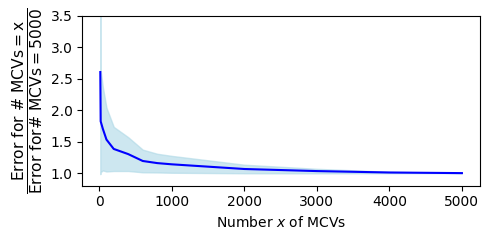

In [119]:
df_data = construct_df("joblight")
plot_mcv_sensitivity(df_data, multiplier=0.24, y_lim=3.5)